<a href="https://colab.research.google.com/github/Emmanuelarchie/Detecting-Toxicity-in-Text-emailing-systems-/blob/main/Detecting_Toxicity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers datasets evaluate


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.1/84.1 kB 2.1 MB/s eta 0:00:00


In [ ]:
# Basic dataset information
import pandas as pd

# Load the dataset
df = pd.read_csv("train_updated.csv")
df = df[df['clean_text'].str.strip() != ""]

# Show basic info
df.info()

# Show first few rows
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179571 entries, 0 to 179570
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype 
---  ------      --------------   ----- 
 0   clean_text  179542 non-null  object
 1   toxic       179571 non-null  int64 
 2   augmented   179571 non-null  object
dtypes: int64(1), object(2)
memory usage: 4.1+ MB


,clean_text,toxic,augmented
0,do so sexually with me,1,original
1,"you are personally attacking me, you have pers...",1,paraphrased
2,if you feel that any portion of the article ma...,0,original
3,please stop removing content from wikipedia; i...,0,original
4,i demand that someone un-delete the simcity 5 ...,0,original


clean_text    19
toxic          0
dtype: int64
toxic
0    144277
1     15294
Name: count, dtype: int64


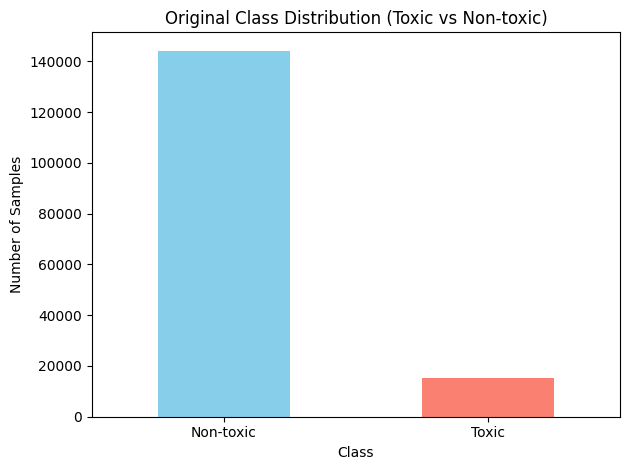

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("toxic_cleaned.csv")
df = df[df['clean_text'].str.strip() != ""]

# Check for null values
print(df.isnull().sum())

# Check class distribution
print(df['toxic'].value_counts())

import matplotlib.pyplot as plt

# Map numeric labels to class names
label_names = {0: 'Non-toxic', 1: 'Toxic'}
label_counts = df['toxic'].map(label_names).value_counts()

# Plot with custom labels
label_counts.plot(kind='bar', title='Original Class Distribution (Toxic vs Non-toxic)', color=['skyblue', 'salmon'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("train_updated.csv")

# Ensure clean data
df = df.dropna(subset=["clean_text", "labels"])

# Split into toxic and non-toxic
toxic_df = df[df["labels"] == 1]
non_toxic_df = df[df["labels"] == 0]

# Downsample non-toxic to match toxic size
non_toxic_sampled = non_toxic_df.sample(n=2*len(toxic_df), random_state=42)

# Combine
balanced_df = pd.concat([toxic_df, non_toxic_sampled]).sample(frac=1.0, random_state=42).reset_index(drop=True)

# Save or use this
balanced_df.to_csv("balanced_train.csv", index=False)

print("✅ Balanced dataset created!")
print("Class distribution:\n", balanced_df["labels"].value_counts())

import matplotlib.pyplot as plt

# Map numeric labels to class names
label_names = {0: 'Non-toxic', 1: 'Toxic'}
label_counts = balanced_df['labels'].map(label_names).value_counts()

# Plot with custom labels
label_counts.plot(kind='bar', title='Balanced Class Distribution (Toxic vs Non-toxic)', color=['skyblue', 'salmon'])
plt.xlabel('Class')
plt.ylabel('Number of Samples')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


KeyError: ['labels']

In [ ]:
import re

def clean_text(text):
    text = str(text).lower()
    # Remove standard URLs (http, https, www)
    text = re.sub(r"(https?:\/\/|www\.)\S+", "", text)
    # Remove path-like or pseudo-URL strings: things with multiple slashes or colons
    text = re.sub(r"\(?\b(?:[a-z0-9]+[:/])+[a-z0-9/]+\)?", "", text)
    text = re.sub(r"@\w+", "", text)          # remove mentions
    text = re.sub(r"#\w+", "", text)          # remove hashtags
    text = re.sub(r"\d{1,2}:\d{2}", "", text)  # remove times like 21:51
    text = re.sub(r"\b(january|february|march|april|may|june|july|august|september|october|november|december)\s+\d{1,2},\s*\d{4}(?:\s*\(utc\))?","", text)
    text = re.sub(r"\d{4}", "", text)          # remove years like 2016

    # Remove IP addresses with optional ports (e.g., 70.100.229.154 :57 or 192.168.1.1:8080)
    #text = re.sub(r"\b(?:\d{1,3}\.){3}\d{1,3}\s*:?\d*\b", "", text)
    text = re.sub(r"(?<!\d)(?:(?:\d{1,3}\.){3}\d{1,3})(?!\d)", "", text)

    # Remove strange encoding characters like â€¢ and other non-ASCII characters
    text = re.sub(r"[^\x00-\x7F]+", " ", text)

    #text = re.sub(r"\d+", "", text)            # remove other numbers
    #text = re.sub(r"[^a-z\s]", "", text)       # remove non-letter characters, optional
    text = re.sub(r"\s+", " ", text)           # collapse whitespace

    text = re.sub(r'\b(\w+)( \1\b)+', r'\1', text)
    return text.strip()

#df['clean_text'] = df['comment_text'].apply(clean_text)
df['clean_text'] = df['clean_text'].apply(clean_text)

#df = df[['clean_text', 'toxic']]
df.to_csv("train_updated.csv", index=False)
#print(repr(df['comment_text'].iloc[1]))       # before
#print(repr(df['clean_text'].iloc[1]))         # after

KeyboardInterrupt: 

labels
0    70568
1    35284
Name: count, dtype: int64


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/794 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at s-nlp/roberta_toxicity_classifier were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

Device set to use cuda:0
100%|██████████| 3308/3308 [18:20<00:00,  3.00it/s]


Classification Report:
              precision    recall  f1-score   support

   non-toxic       0.91      0.99      0.95     70568
       toxic       0.97      0.81      0.88     35284

    accuracy                           0.93    105852
   macro avg       0.94      0.90      0.91    105852
weighted avg       0.93      0.93      0.92    105852

Confusion Matrix:
[[69542  1026]
 [ 6787 28497]]


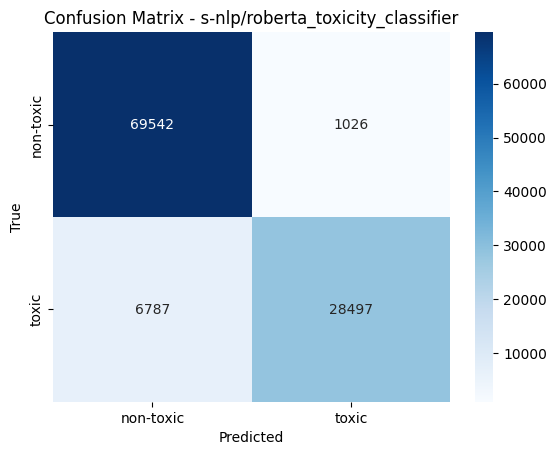

In [ ]:
#Pre trained model evaluation
import pandas as pd

# Load your cleaned dataset
test_df = pd.read_csv("balanced_train.csv")

# Check class distribution
print(test_df['labels'].value_counts())

texts = test_df["clean_text"].tolist()
true_labels = test_df["labels"].tolist()


from transformers import pipeline

classifier = pipeline(
    "text-classification",
    model="s-nlp/roberta_toxicity_classifier",
    device=0,  # ensures model runs on GPU
    truncation=True
)

def clean_text_input(t):
    return str(t).strip() if isinstance(t, str) else ""

from tqdm import tqdm

preds = []

batch_size = 32
for i in tqdm(range(0, len(texts), batch_size)):
    batch = texts[i:i + batch_size]

    # Clean but don't skip — preserve batch size
    clean_batch = [clean_text_input(text) for text in batch]

    # Get predictions
    results = classifier(clean_batch)

    # In case fewer outputs are returned, pad with neutral (safe fallback)
    if len(results) < len(batch):
        results += [{'label': 'neutral', 'score': 1.0}] * (len(batch) - len(results))

    batch_preds = [1 if r['label'].lower() == 'toxic' else 0 for r in results]
    preds.extend(batch_preds)

from sklearn.metrics import classification_report, confusion_matrix

print("Classification Report:")
print(classification_report(true_labels, preds, target_names=["non-toxic", "toxic"]))

print("Confusion Matrix:")
print(confusion_matrix(true_labels, preds))

import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(true_labels, preds)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["non-toxic", "toxic"], yticklabels=["non-toxic", "toxic"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix - s-nlp/roberta_toxicity_classifier")
plt.show()


In [ ]:
#Paraphrasing to augment toxic class in the dataset
import pandas as pd

import torch
torch.cuda.empty_cache()
#torch.cuda.reset_peak_memory_stats()
print("GPU available?", torch.cuda.is_available())

# Load the cleaned 5-fold dataset you created earlier
df = pd.read_csv("toxic_cleaned.csv")

# Filter toxic rows
toxic_df = df[df["toxic"] == 1].copy()


from transformers import pipeline
import re

# Load paraphraser model (T5)
paraphraser = pipeline("text2text-generation", model="Vamsi/T5_Paraphrase_Paws", device=0)

def clean_text(text):
    text = str(text).strip()
    text = re.sub(r"\s+", " ", text)
    return text

toxic_texts = toxic_df["clean_text"].sample(20000, replace=True, random_state=42).tolist()
from datasets import Dataset

# Sample and clean 20,000 toxic rows
sampled_toxic = toxic_df["clean_text"].sample(20000, replace=True, random_state=42).apply(clean_text).tolist()

# Create Hugging Face Dataset
paraphrase_dataset = Dataset.from_dict({"text": [f"paraphrase: {t}" for t in sampled_toxic]})

# Generate paraphrased outputs in batch
outputs = paraphraser(paraphrase_dataset["text"], batch_size=16, max_length=512, truncation=True)

# Extract just the generated text
paraphrased = [item["generated_text"].strip() for item in outputs]


# Convert to DataFrame
paraphrased_df = pd.DataFrame({
    "clean_text": paraphrased,
    "toxic": 1,
    "augmented": "paraphrased"
})


paraphrased_df.to_csv("paraphrased_toxic_comments.csv", index=False)

from google.colab import files
files.download("paraphrased_toxic_comments.csv")




GPU available? True


FileNotFoundError: [Errno 2] No such file or directory: 'toxic_cleaned.csv'

In [ ]:
#Training bert-base-uncased model on our dataset
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from datasets import Dataset
import evaluate
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix
# Load your dataset
df = pd.read_csv("balanced_train.csv")  # Ensure it has 'text' and 'label' columns
df = df.dropna(subset=["clean_text", "labels"])  # Clean missing values


model_name = "google-bert/bert-base-uncased"

from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
)

print(model.config)

tokenizer = AutoTokenizer.from_pretrained(model_name)

# Define metrics
f1_metric = evaluate.load("f1")
accuracy_metric = evaluate.load("accuracy")

best_f1 = 0
best_fold = 0
f1_scores = []
confusion_matrices = []

def tokenize(batch):
    return tokenizer(batch["clean_text"], padding="max_length", truncation=True, max_length=512)

def compute_metrics(pred):
    logits, labels = pred

    print(f"logits shape: {logits.shape}, labels shape: {labels.shape}, labels dtype: {labels.dtype}")

    preds = np.argmax(logits, axis=-1)

    # Accuracy
    acc = accuracy_metric.compute(predictions=preds, references=labels)["accuracy"]

    # Macro F1 (average over both classes)
    macro_f1 = f1_metric.compute(predictions=preds, references=labels, average="macro")["f1"]

    # Binary F1, Precision, Recall (focus on toxic class)
    binary_f1 = f1_score(labels, preds, pos_label=1)
    precision = precision_score(labels, preds, pos_label=1)
    recall = recall_score(labels, preds, pos_label=1)

    # Confusion Matrix
    cm = confusion_matrix(labels, preds)
    print("Confusion Matrix:")
    print(cm)

    # Plot Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Toxic", "Toxic"], yticklabels=["Non-Toxic", "Toxic"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Save scores
    f1_scores.append(binary_f1)
    confusion_matrices.append(cm)

    return {
        "accuracy": acc,
        "f1_macro": macro_f1,
        "f1_toxic": binary_f1,
        "precision_toxic": precision,
        "recall_toxic": recall
    }
# Convert to Hugging Face dataset format
all_texts = df["clean_text"].tolist()
all_labels = df["labels"].astype(int).tolist()


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


fold = 1
for train_index, val_index in skf.split(all_texts, all_labels):
    print(f"\n🔁 Fold {fold}")

    train_df = pd.DataFrame({
        "clean_text": [all_texts[i] for i in train_index],
        "labels": [all_labels[i] for i in train_index]
    })

    val_df = pd.DataFrame({
        "clean_text": [all_texts[i] for i in val_index],
        "labels": [all_labels[i] for i in val_index]
    })


    # Convert to Hugging Face datasets and tokenize
    train_dataset = Dataset.from_pandas(train_df).map(tokenize, batched=True).remove_columns(["clean_text"])
    val_dataset = Dataset.from_pandas(val_df).map(tokenize, batched=True).remove_columns(["clean_text"])

    print(train_dataset[0])
    print(val_dataset[0])

    # Training configuration
    training_args = TrainingArguments(
        output_dir=f"./results_fold_{fold}",
        eval_strategy="epoch",
        save_strategy="epoch",
        logging_dir=f"./logs_fold_{fold}",
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=3,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="eval_f1_toxic",
        logging_steps=50,
        save_total_limit=1
    )

    # Trainer setup
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    for batch in trainer.get_train_dataloader():
      print(batch['labels'].shape, batch['labels'].dtype)
      break
    # Train
    trainer.train()

    # Evaluate
    metrics = trainer.evaluate()
    if metrics["eval_f1_toxic"] > best_f1:
      best_f1 = metrics["eval_f1_toxic"]
      best_fold = fold
      trainer.save_model(f"./best_model")
      tokenizer.save_pretrained(f"./best_model")

    print(f"📊 Fold {fold} Evaluation Metrics:", metrics)

    fold += 1

print("Average Toxic F1 Score:", np.mean(f1_scores))

# Optionally, sum confusion matrices:
total_cm = sum(confusion_matrices)
print("Total Confusion Matrix:\n", total_cm)


# Save to text file
with open("final_results.txt", "w") as f:
    f.write(f"Average Toxic F1 Score: {np.mean(f1_scores):.4f}\n\n")
    f.write("Total Confusion Matrix:\n")
    for row in total_cm:
        f.write(" ".join(map(str, row)) + "\n")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at google-bert/bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertConfig {
  "architectures": [
    "BertForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "classifier_dropout": null,
  "gradient_checkpointing": false,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 512,
  "model_type": "bert",
  "num_attention_heads": 12,
  "num_hidden_layers": 12,
  "pad_token_id": 0,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.52.2",
  "type_vocab_size": 2,
  "use_cache": true,
  "vocab_size": 30522
}


🔁 Fold 1


Map:   0%|          | 0/84681 [00:00<?, ? examples/s]

Map:   0%|          | 0/21171 [00:00<?, ? examples/s]

{'labels': 0, 'input_ids': [101, 1000, 1006, 11396, 1007, 10651, 1010, 1042, 10139, 1024, 3720, 2005, 1037, 2051, 1997, 1012, 2514, 2489, 2000, 5587, 7928, 1012, 4283, 999, 1006, 2831, 1007, 1010, 1017, 2258, 1000, 102, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

<ipython-input-1-594a2b6ae642>:116: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


torch.Size([8]) torch.int64


wandb: WARNING The `run_name` is currently set to the same value as `TrainingArguments.output_dir`. If this was not intended, please specify a different run name by setting the `TrainingArguments.run_name` parameter.
wandb: Currently logged in as: mehroz (mehroz-university-of-hertfordshire) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


Epoch,Training Loss,Validation Loss


In [ ]:
#Training distilroberta-base model on our dataset
import pandas as pd
import numpy as np
from transformers import AutoTokenizer, AutoModelForSequenceClassification, TrainingArguments, Trainer
from sklearn.model_selection import StratifiedKFold
from sklearn.utils.class_weight import compute_class_weight
from datasets import Dataset
import evaluate
import torch
import torch.nn as nn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score, precision_score, recall_score, confusion_matrix

from sklearn.metrics import classification_report, confusion_matrix
# Load your dataset
df = pd.read_csv("balanced_train.csv")  # Ensure it has 'text' and 'label' columns
df = df.dropna(subset=["clean_text", "labels"])  # Clean missing values


model_name = "distilbert/distilroberta-base"

from transformers import AutoTokenizer, AutoModelForSequenceClassification, AutoConfig

model = AutoModelForSequenceClassification.from_pretrained(
    model_name,
    num_labels=2,
)

print(model.config)

tokenizer = AutoTokenizer.from_pretrained(model_name)

# Define metrics
f1_metric = evaluate.load("f1")
accuracy_metric = evaluate.load("accuracy")

best_f1 = 0
best_fold = 0
f1_scores = []
confusion_matrices = []

def tokenize(batch):
    return tokenizer(batch["clean_text"], padding="max_length", truncation=True, max_length=512)

def compute_metrics(pred):
    logits, labels = pred

    print(f"logits shape: {logits.shape}, labels shape: {labels.shape}, labels dtype: {labels.dtype}")

    preds = np.argmax(logits, axis=-1)

    # Accuracy
    acc = accuracy_metric.compute(predictions=preds, references=labels)["accuracy"]

    # Macro F1 (average over both classes)
    macro_f1 = f1_metric.compute(predictions=preds, references=labels, average="macro")["f1"]

    # Binary F1, Precision, Recall (focus on toxic class)
    binary_f1 = f1_score(labels, preds, pos_label=1)
    precision = precision_score(labels, preds, pos_label=1)
    recall = recall_score(labels, preds, pos_label=1)

    # Confusion Matrix
    cm = confusion_matrix(labels, preds)
    print("Confusion Matrix:")
    print(cm)

    # Plot Confusion Matrix
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Toxic", "Toxic"], yticklabels=["Non-Toxic", "Toxic"])
    plt.xlabel("Predicted")
    plt.ylabel("True")
    plt.title("Confusion Matrix")
    plt.show()

    # Save scores
    f1_scores.append(binary_f1)
    confusion_matrices.append(cm)

    return {
        "accuracy": acc,
        "f1_macro": macro_f1,
        "f1_toxic": binary_f1,
        "precision_toxic": precision,
        "recall_toxic": recall
    }
# Convert to Hugging Face dataset format
all_texts = df["clean_text"].tolist()
all_labels = df["labels"].astype(int).tolist()


skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)


fold = 1
for train_index, val_index in skf.split(all_texts, all_labels):
    print(f"\n🔁 Fold {fold}")

    train_df = pd.DataFrame({
        "clean_text": [all_texts[i] for i in train_index],
        "labels": [all_labels[i] for i in train_index]
    })

    val_df = pd.DataFrame({
        "clean_text": [all_texts[i] for i in val_index],
        "labels": [all_labels[i] for i in val_index]
    })


    # Convert to Hugging Face datasets and tokenize
    train_dataset = Dataset.from_pandas(train_df).map(tokenize, batched=True).remove_columns(["clean_text"])
    val_dataset = Dataset.from_pandas(val_df).map(tokenize, batched=True).remove_columns(["clean_text"])

    print(train_dataset[0])
    print(val_dataset[0])

    # Training configuration
    training_args = TrainingArguments(
        output_dir=f"./results_fold_{fold}",
        eval_strategy="epoch",
        save_strategy="epoch",
        logging_dir=f"./logs_fold_{fold}",
        learning_rate=2e-5,
        per_device_train_batch_size=16,
        per_device_eval_batch_size=16,
        num_train_epochs=3,
        weight_decay=0.01,
        load_best_model_at_end=True,
        metric_for_best_model="eval_f1_toxic",
        logging_steps=50,
        save_total_limit=1
    )

    # Trainer setup
    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=tokenizer,
        compute_metrics=compute_metrics
    )

    for batch in trainer.get_train_dataloader():
      print(batch['labels'].shape, batch['labels'].dtype)
      break
    # Train
    trainer.train()

    # Evaluate
    metrics = trainer.evaluate()
    if metrics["eval_f1_toxic"] > best_f1:
      best_f1 = metrics["eval_f1_toxic"]
      best_fold = fold
      trainer.save_model(f"./best_model")
      tokenizer.save_pretrained(f"./best_model")

    print(f"📊 Fold {fold} Evaluation Metrics:", metrics)

    fold += 1

print("Average Toxic F1 Score:", np.mean(f1_scores))

# Optionally, sum confusion matrices:
total_cm = sum(confusion_matrices)
print("Total Confusion Matrix:\n", total_cm)


# Save to text file
with open("final_results.txt", "w") as f:
    f.write(f"Average Toxic F1 Score: {np.mean(f1_scores):.4f}\n\n")
    f.write("Total Confusion Matrix:\n")
    for row in total_cm:
        f.write(" ".join(map(str, row)) + "\n")


/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/480 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/331M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at distilbert/distilroberta-base and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


RobertaConfig {
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-05,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.52.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 50265
}



tokenizer_config.json:   0%|          | 0.00/25.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]


🔁 Fold 1


Map:   0%|          | 0/84681 [00:00<?, ? examples/s]

KeyboardInterrupt: 

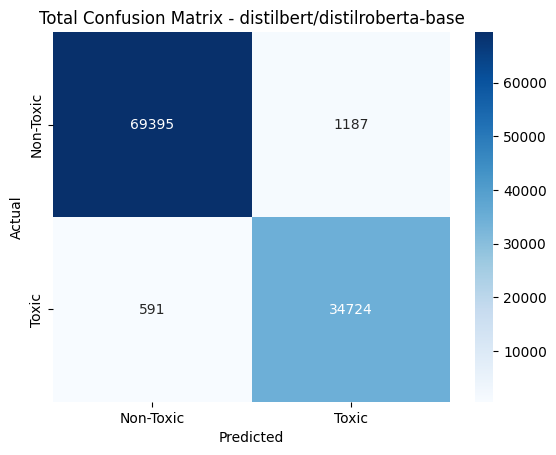

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

cm = [[69395, 1187], [591, 34724]]
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=["Non-Toxic", "Toxic"],
            yticklabels=["Non-Toxic", "Toxic"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Total Confusion Matrix - distilbert/distilroberta-base")
plt.show()
